# Regression with an Abalone Dataset
**Jack Masin**

## Project Summary

The goal of this project is to predict the age of an abalone based on a variety of physical measurements. This will be done with regression by using the root mean squared logarithmic error (RMSLE) evaluation function. Ridge regression, support vector regression, and ensemble regression models were all implemented. The ensemble regression model ended up having the lowest error rate and the highest model score.

## Problem Statement

I am trying to predict the age (based on rings) of an abalone based on the following attributes: sex, length, diameter, height, weight, shucked weight, viscera weight, and shell weight. I am using the root mean squared logarithmic error (RMSLE) evaluation function for the benchmark. The dataset was generated from a deep learning model trained on the UC Irvine Machine Learning Repository Abalone dataset. The dataset has 151,026 instances and 8 features. I want the final model to have a low root mean squared logarithmic error rate and a high model score.

## Dataset

The dataset contains 10 attributes being ID, sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, and rings. The table below lists the attributes and their descriptions.

| Variable Name | Role | Type | Description | Units | Missing Values|
|---------------|-----|-----|-------------|-----|-------------|
| ID | ID | Integer | Unique ID | - | no |
| Sex | Feature | Categorical | M, F, and I (infant) | - | no |
| Length | Feature | Continuous | Longest shell measurement | mm | no |
| Diameter | Feature | Continuous | Perpendicular to length | mm | no |
| Height | Feature | Continuous | With meat in shell | mm | no |
| Whole_weight | Feature | Continuous | Whole abalone | grams | no |
| Shucked_weight | Feature | Continuous | Weight of meat | grams | no |
| Viscera_weight | Feature | Continuous | Gut weight (after bleeding) | grams | no |
| Shell_weight | Feature | Continuous | After being dried | grams | no |
| Rings | Target | Integer | +1.5 gives the age in years | - | no |

The dataset contains 151,026 instances between the training and testing sets. The training set has 90,615 instances and the testing set having 60,411 instances. This means there is a 60/40 split between the training and testing set respectively.

The sex attribute was split into three dummy variables named "Sex-M", "Sex-F", and "Sex-I." The raw data was then saved in addition to the processed data.

## Exploratory Data Analysis

I am planning on using heatmaps and pairplots to visualize the correlation between the features. I felt feature normalization was not necessary because all the features have a similar range of values.

### Heatmap

The heatmap below was used to get a basic idea of the correlation between the features.

![Heatmap](./images/heatmap.png "Heatmap")

### Pairplot

The pairplot below was used to get an idea of the correleation between specific features.

![Pairplot](./images/pairplot.png "Pairplot")

## Data Preprocessing

Since there are no strong correlations between rings and the other features, I considered using dimensionality reduction to try to find a stronger correlation. I tried using PCA to reduce the dimensionality of the dataset, but that made the models less accurate. Because of this, I decided not to use dimensionality reduction and let the models train on all the features.

## Machine Learning Approaches

Regression will be used to predict the number of rings on an abalone, thus giving an estimate of the age. Linear regression will be used as a baseline for our models. I chose to use linear regression for our baseline because it is the most basic form of regression.

Since there are no strong correlations between rings and the other features, multiple features will be used to predict the number of rings. This means that the following machine learning methods will be tested:
* Ridge Regression
* Support Vector Regression with linear kernel
* Support Vector Regression with RBF kernel (if necessary)
* Ensemble Regression (if necessary)

The unscaled dataset was used to train all the models. The linear regression model was created first to use as a baseline for the other models. This model had a root mean squared logarithmic error of 0.18 and a model score of 0.489.

After the baseline model was created, the ridge regression model and the support vector regression model with a linear kernel were created. The ridge regression model was slightly worse than the baseline model with a root mean squared logarithmic error of 0.19 and a model score of 0.486. The support vector regression model with a linear kernel had a root mean squared logarithmic error of 0.17 and a model score of 0.583.

Since neither of the models were significantly better than the baseline, I decided to test the support vector regression model with an RBF kernel and the ensemble regression model. The support vector regression model with an RBF kernel had a root mean squared logarithmic error of 0.16 and a model score of 0.626. The ensemble regression model was the best model created for this dataset. It had a root mean squared logarithmic error of 0.15 and a model score of 0.658.

## Expirements

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_log_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import numpy as np

In [2]:
# Create dataset from csv files
training_set = pd.read_csv('data/train.csv')
testing_set = pd.read_csv('data/test.csv')

training_set.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
# Check for any null values in the training set
training_set.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
# Dataset description
training_set.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [3]:
# Create a copy of the training set for data visualization
vis_set_train = pd.get_dummies(training_set, columns=['Sex'], prefix='Sex', prefix_sep='-')
vis_set_train.drop(columns='id', inplace=True)
vis_set_train.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex-F,Sex-I,Sex-M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


### Pairplot of Training Set

d:\Users\jjmas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\jjmas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\jjmas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\jjmas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

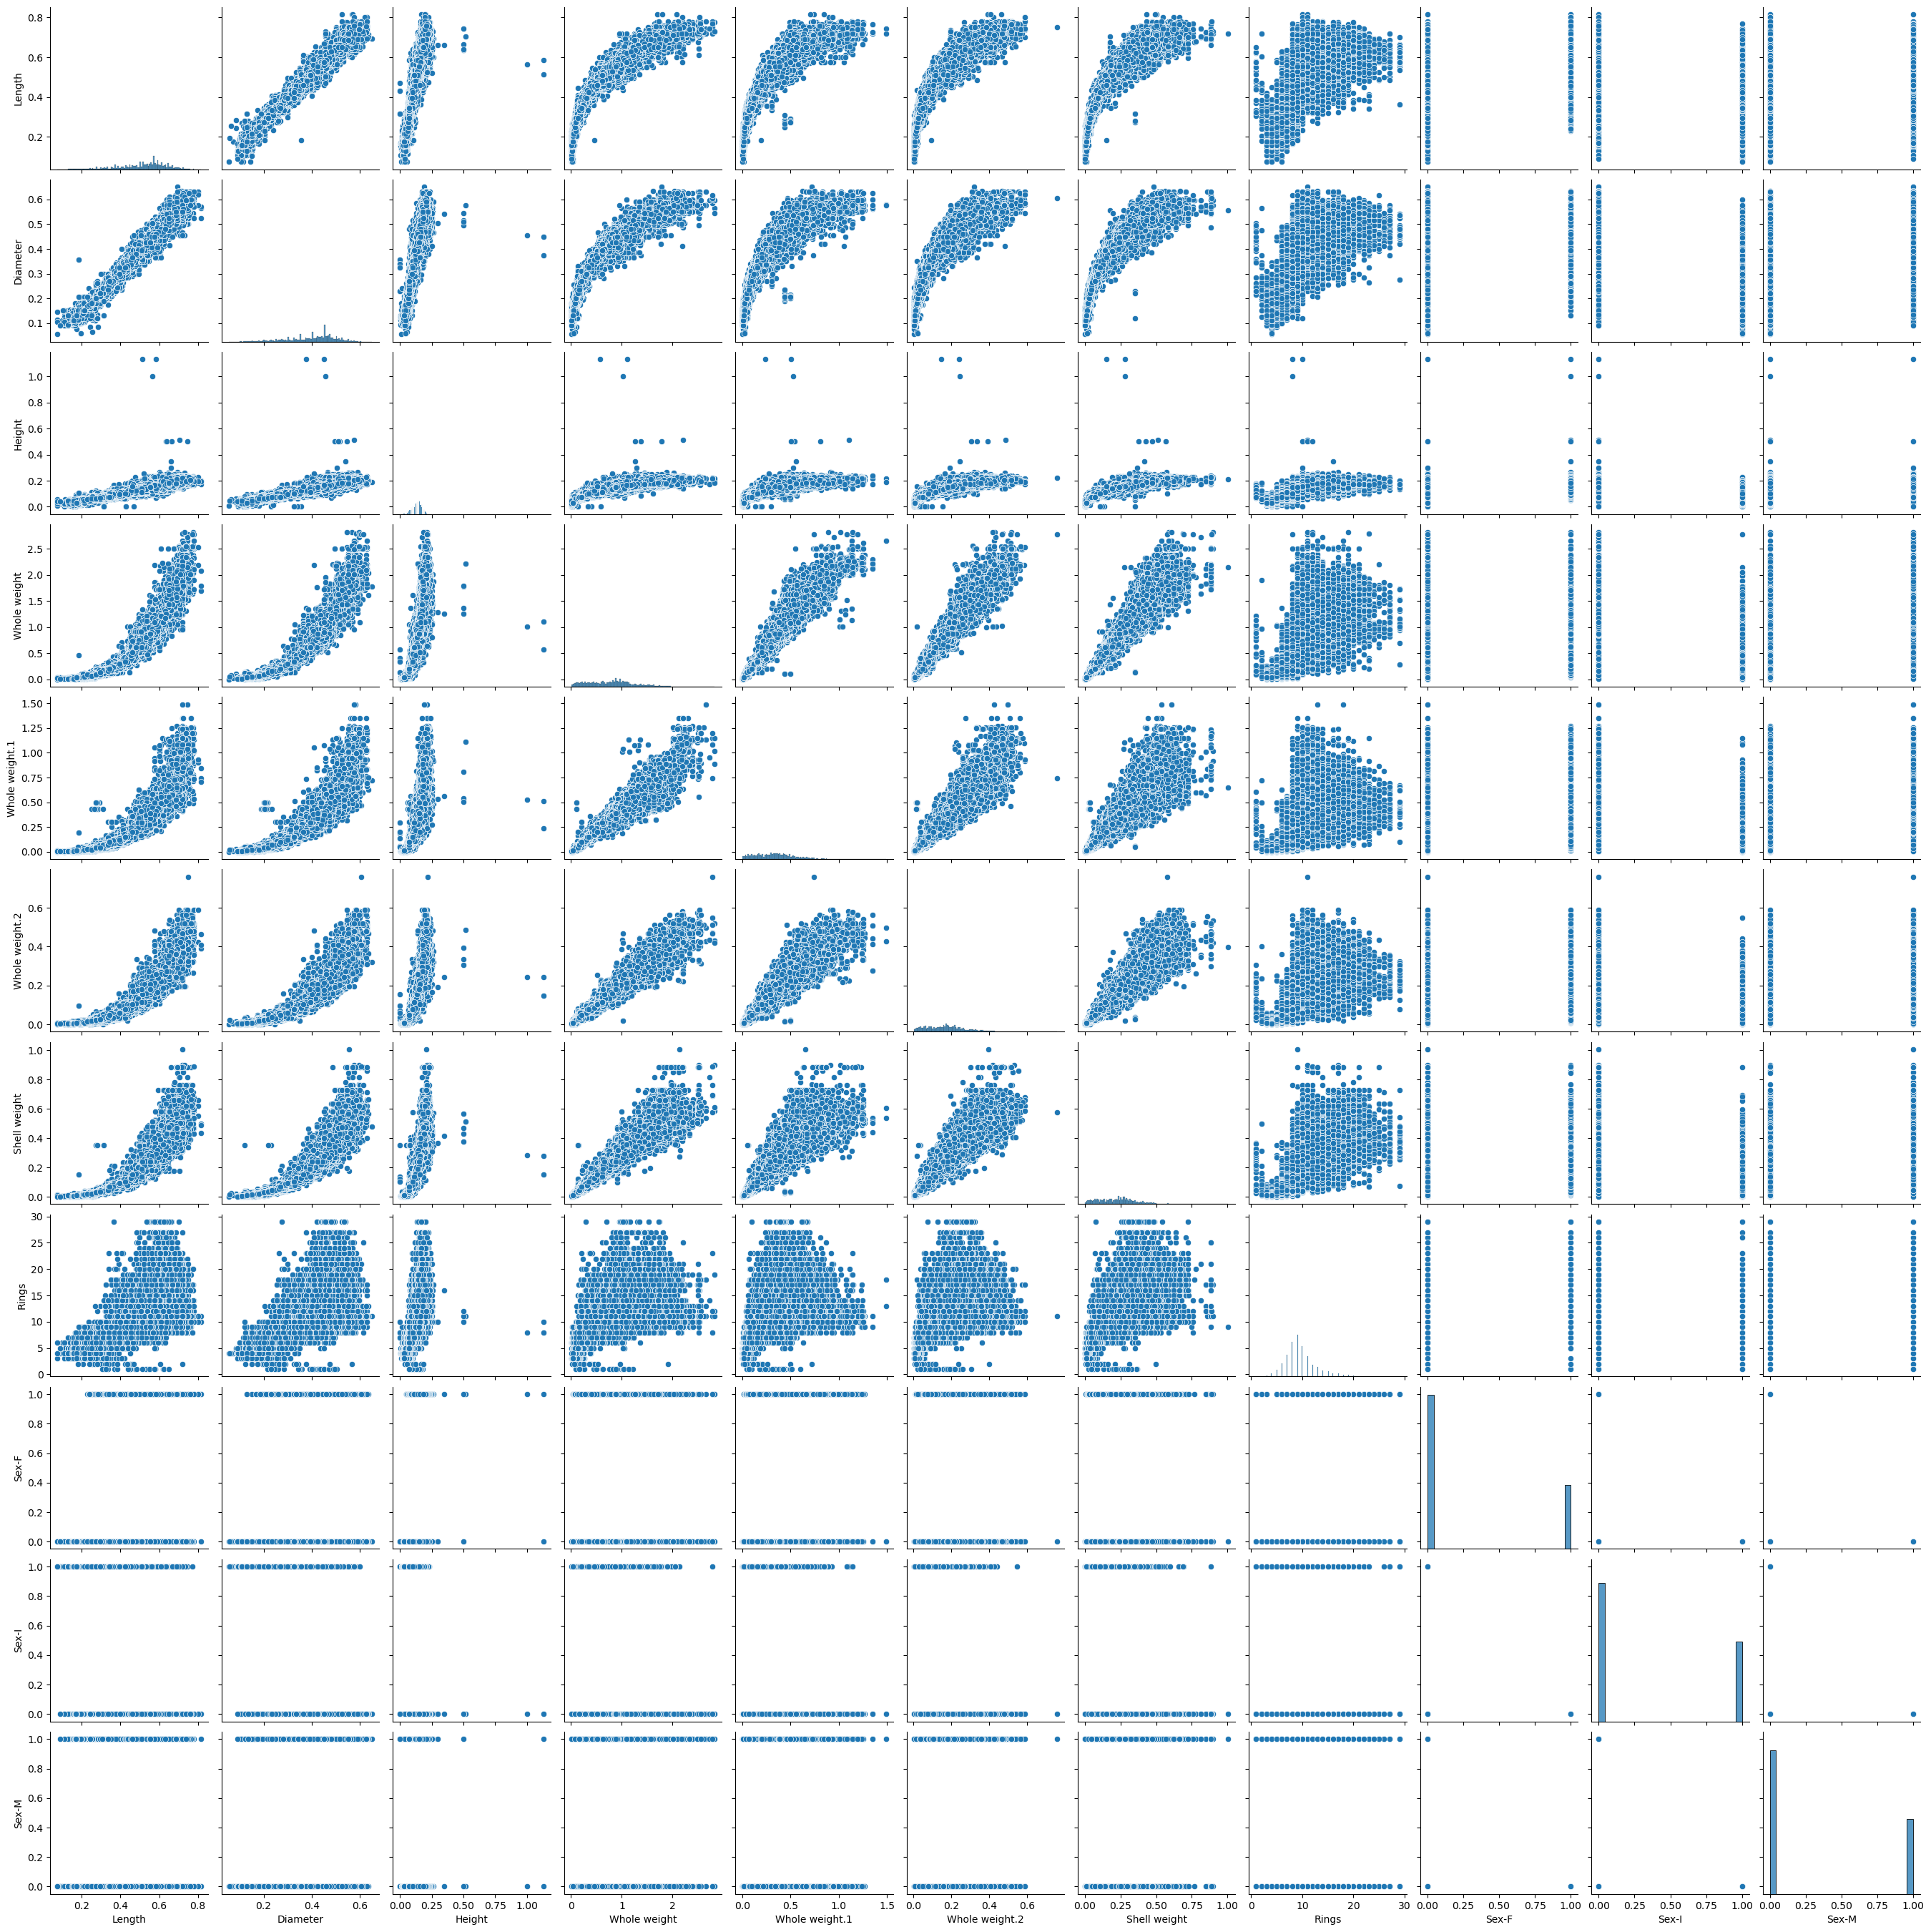

In [7]:
sns.pairplot(vis_set_train)

### Heatmap of Training Set

<Axes: >

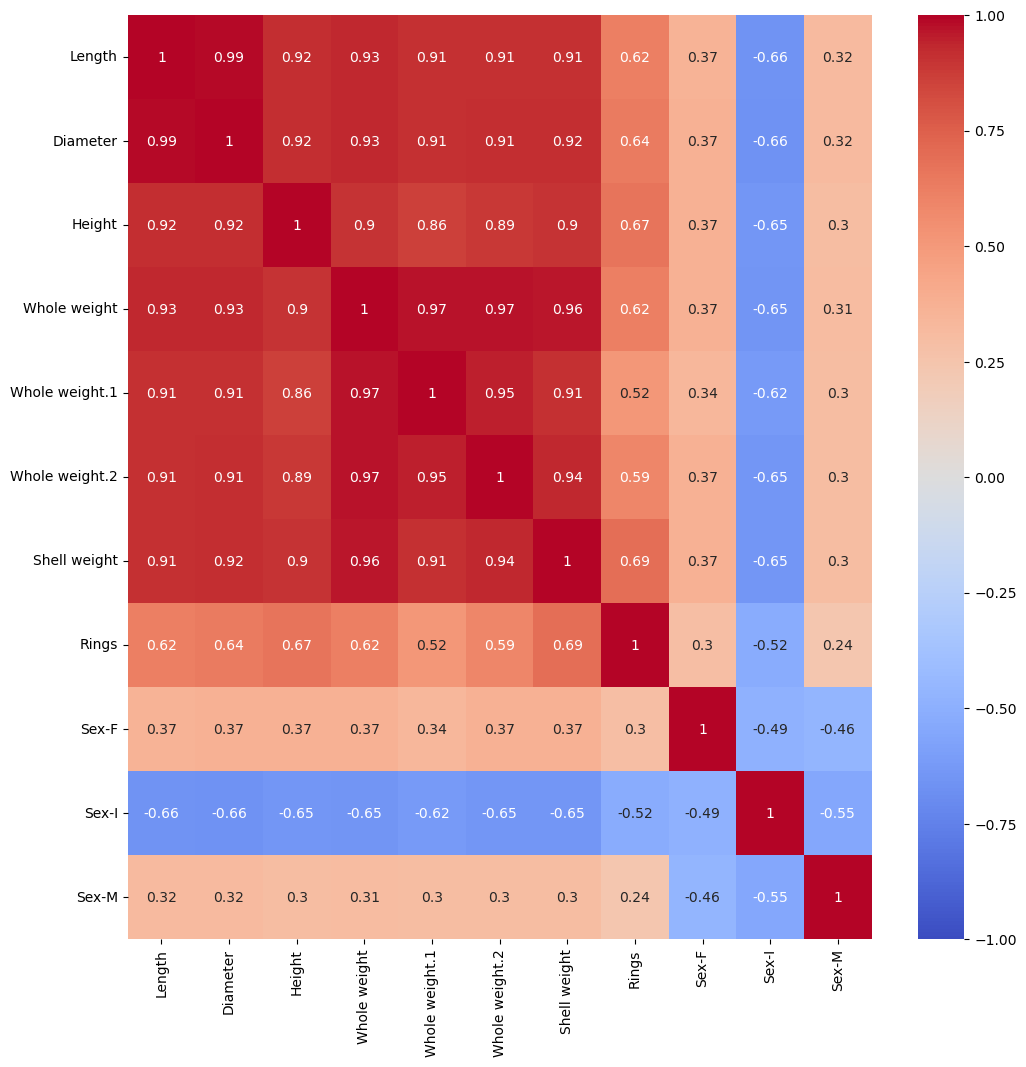

In [7]:
plt.figure(figsize=(12, 12))
sns.heatmap(vis_set_train.corr(), annot=True, cmap='coolwarm', vmin=-1)

### Data Preparation

In [7]:
# Separate x and y variables
Y = training_set.Rings
X = training_set.drop(columns='Rings')
X = pd.get_dummies(X, columns=['Sex'], prefix='Sex', prefix_sep='-')
X.drop(columns='id', inplace=True)
X.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex-F,Sex-I,Sex-M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,False,True,False


In [4]:
# Get dummy variables from testing set
testing_set = pd.get_dummies(testing_set, columns=['Sex'], prefix='Sex', prefix_sep='-')
id = testing_set.id
testing_set.drop(columns='id', inplace=True)
testing_set.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex-F,Sex-I,Sex-M
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,False,False,True
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,False,False,True
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,False,False,True
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,False,False,True
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,False,True,False


In [11]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

### Baseline Model (Linear Regression)

In [16]:
# Build linear regression model
linear = LinearRegression(positive=True)
linear.fit(x_train, y_train)

LinearRegression(positive=True)

In [17]:
# Model scoring
y_pred = linear.predict(x_val)
rmsle = root_mean_squared_log_error(y_val, y_pred)
print('Baseline root mean squared logarithmic error (RMSLE): {:.2f}'.format(rmsle))
print(linear.score(x_val, y_val))

Baseline root mean squared logarithmic error (RMSLE): 0.18
0.48862965687384463


### Ridge Regression

In [19]:
# Build ridge regression model
ridge = Ridge(alpha=1.0, positive=True)
ridge.fit(x_train, y_train)

Ridge(positive=True)

In [20]:
# Model scoring
y_pred = ridge.predict(x_val)
rmsle = root_mean_squared_log_error(y_val, y_pred)
print('Test root mean squared logarithmic error (RMSLE): {:.2f}'.format(rmsle))
print(ridge.score(x_val, y_val))

Test root mean squared logarithmic error (RMSLE): 0.19
0.48635367303650956


### Support Vector Regression with Linear Kernel

In [21]:
# Build support vector regression model with linear kernel
svrlk = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.2))
svrlk.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [23]:
# Model scoring
y_pred = svrlk.predict(x_val)

# Force predictions to be positive by setting negative values to 0
y_pred[y_pred < 0] = 0

rmsle = root_mean_squared_log_error(y_val, y_pred)
print('Test root mean squared logarithmic error (RMSLE): {:.2f}'.format(rmsle))
print(svrlk.score(x_val, y_val))

Test root mean squared logarithmic error (RMSLE): 0.17
0.5825813299622056


### Support Vector Regression with RBF Kernel

In [24]:
svrrbf = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svrrbf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [25]:
y_pred = svrrbf.predict(x_val)
rmsle = root_mean_squared_log_error(y_val, y_pred)
print('Test root mean squared logarithmic error (RMSLE): {:.2f}'.format(rmsle))
print(svrrbf.score(x_val, y_val))

Test root mean squared logarithmic error (RMSLE): 0.16
0.625678873278182


### Ensemble Regression

In [72]:
# Build ensemble regression model
ensemble = HistGradientBoostingRegressor(scoring='neg_root_mean_squared_log_error', learning_rate=0.2, loss='gamma')
ensemble.fit(x_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.2, loss='gamma',
                              scoring='neg_root_mean_squared_log_error')

In [73]:
# Model scoring
y_pred = ensemble.predict(x_val)
rmsle = root_mean_squared_log_error(y_val, y_pred)
print('Test root mean squared logarithmic error (RMSLE): {:.2f}'.format(rmsle))
print(ensemble.score(x_val, y_val))

Test root mean squared logarithmic error (RMSLE): 0.15
0.6579233826509261


### Evaluation Metrics Comparison

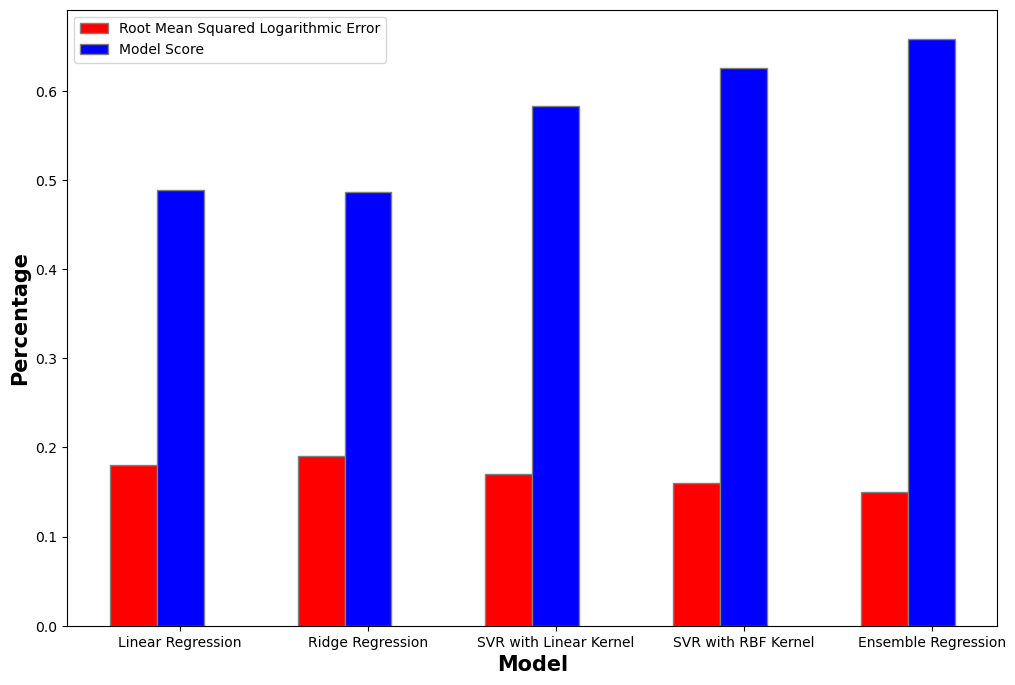

In [75]:
barWidth = 0.25
fig = plt.subplots(figsize = (12, 8))

rsmle_values = [0.18, 0.19, 0.17, 0.16, 0.15]
score_values = [0.489, 0.486, 0.583, 0.626, 0.658]

br1 = np.arange(len(rsmle_values))
br2 = [x + barWidth for x in br1]

plt.bar(br1, rsmle_values, color='r', width=barWidth, edgecolor='grey', label='Root Mean Squared Logarithmic Error')
plt.bar(br2, score_values, color='b', width=barWidth, edgecolor='grey', label='Model Score')

plt.xlabel('Model', fontweight='bold', fontsize=15)
plt.ylabel('Percentage', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(rsmle_values))], ['Linear Regression', 'Ridge Regression', 'SVR with Linear Kernel', 'SVR with RBF Kernel', 'Ensemble Regression'])

plt.legend()
plt.show()

### Kaggle Submission

In [79]:
rings = ensemble.predict(testing_set)

submission = pd.DataFrame({'id': id, 'Rings': rings})
submission.to_csv('submission.csv', index=False)

![Kaggle Submission](./images/kaggle%20submission.PNG "kaggle submission")

**Note:** The Kaggle submission was made before the support vector regression model with an RBF kernel and the ensemble regression model were implemented. Therefore, the Kaggle submission used the ridge regression model. It was also submitted before I realized that dimensionality reduction made the models less accurate. The final version of my model would be ranked #1541 and have a score of 0.14963

I used root mean squared logarithmic error and model score to evaluate each of the models. The ensemble regression model, which was the best model, had a 3% lower error rate and a 16.9% higher model score than the baseline linear regression model.

There were several other models created by other people using the same dataset. The other models were better than the one I created. These models were based on boosting models using LightGBM and XGBoost and artificial neural networks. These models ended up having a root mean squared logarithmic error rate around 0.145. In the future, I will look into using libraries other than sklearn because most of the high-ranking models used other libraries.

## Conclusion

My original plan to use PCA for dimensionality reduction did not work and made the models less accurate. The models had a root mean squared logarithic error around 0.21 and a model score around 0.35 when using the dataset with reduced dimensionality. In the end, being able to consider all the features made the model the most accurate. Ridge regression also didn't work very well because it ended up being very similar to the baseline model. My approach for tuning the model parameters was simply trial and error. However, this approach was very inefficient. In the future, I would automate the process of tuning the model parameters by looping through possible values in a for loop and documenting the results.